# PHASE 4 GROUP v PROJECT - TIME SERIES MODELING USING ZILLOW HOUSING DATA 🏘️.
`Student Names:`
  - Silvia Gworit
  - Dennis Mwenda
  - Myra Kadenge
  - Paul Muniu


## **1. BUSINESS UNDERSTANDING.**

### 1.1 Introduction

The global marketplace has witnessed everchanging trends in different industries, and the real estate sector is no exception.To remain relevant and increase profitability in the Real estate market it is advantageous for leading Real Estate companies to study this trends so as to stay ahead. Happy Homes Partners are investors in the real estate market and have acknowledged that data science plays a pivotal role by uncovering hidden investment opportunities and steering clients towards profitable ventures.

### 1.2 Business Problem

Happy Homes Partners is looking to expand their property investments and are looking for optimal locations for their investment. We as Tech to Tech hub have a primary objective to facilitate informed real estate investment decisions for the Happy Homes Partners. Using the extensive housing dataset from Zillow, covering the period from April 1996 to April 2018, the project seeks to pinpoint the top 5 zip codes with the most promising investment potential.

### 1.3 Objectives
a) Main Objective

`Project Question`

What are the top 5 best zip codes for us'Happy Homes Partners' to invest in?

b) Specific Objective

1. To identify and establish the top 5 best performing zipcodes(Regions) with the highest ROI.

2. To develop time series models to forecast real estate prices for different zip codes over various time horizons.

3. To evaluate the performance of time series models using appropriate metrics, ensuring reliability and effectiveness in predicting real estate prices.


## **2. DATA UNDERSTANDING.**

We will be using the Zillow Housing dataset, a CSV file for this project.
The dataset covers a large period from April 1996 to April 2018, allowing us to study long-term trends and different market conditions. It's a valuable resource for analyzing how prices have changed over time and predicting future trends.

### 2.1 Summary of the Dataset

`RegionID` - This is unique Id for the Regions.

`SizeRank` - This is the ranking done based on the size of the Region.

`RegionName` - This field contains the zip code of the Region.

`RegionType` - Type of Region is Zip.

`StateName` - Names of the of the various states.

`City` - This column provide the specific City Name of Housing Data.

`Metro` - This provide the name of the metro city around that Region.

`County Name `- This is the County Name for that Region.

`Months Column` - These Columns contains the prices of Region for every month.

### 2.2 Data Inspection

In [202]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

#modeling
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA        
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import TimeSeriesSplit 

# Custom Options for displaying rows.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',100)

In [203]:
# load the datasets
df = pd.read_csv('zillow_data.csv')

# View the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,...,863900.0,872900.0,883300.0,889500.0,892800,893600,891300,889900,891500,893000,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,193400.0,193100.0,192700.0,193000.0,193700.0,194800.0,196100.0,197800.0,199700.0,201900.0,...,234200.0,235400.0,236600.0,238500.0,240500,242600,244700,246300,247600,249600,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,277000.0,283600.0,288500.0,293900.0,299200.0,304300.0,308600.0,311400.0,312300.0,311900.0,...,282100.0,284200.0,286000.0,288300.0,290700,293300,295900,298300,300200,301300,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,618600.0,625600.0,631100.0,636600.0,642100.0,647600.0,653300.0,659300.0,665800.0,672900.0,...,1149900.0,1155200.0,1160100.0,1163300.0,1167700,1173900,1175100,1173500,1175500,1178500,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,129900

In [204]:
# View last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,93700.0,93400.0,93200.0,93000.0,92900.0,92700.0,92600.0,92600.0,92600.0,92800.0,93100.0,93500.0,94000.0,94500.0,95100.0,95800.0,96500.0,97100.0,97800.0,98500.0,99200.0,100000.0,100800.0,101700.0,102600.0,103400.0,104200.0,104900.0,105600.0,106300.0,106800.0,107300.0,107800.0,108400.0,109000.0,109600.0,110200.0,110800.0,111400.0,112000.0,...,187600.0,187300.0,187300.0,188100.0,189600,190800,189800,188500,189400,191100,192400,193300,193400,192000,191200,190900,190900,191100,191900,191400,190700,190300,189500,188700,188600,189400,189600,189000,189000,190200,190700,190600,190300,193200,200200,206900,209600,211500,213600,215400,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,92200.0,92100.0,91900.0,91700.0,91300.0,90900.0,90500.0,90100.0,89800.0,89600.0,89400.0,89300.0,89200.0,89100.0,88900.0,88700.0,88400.0,88100.0,87700.0,87400.0,87200.0,87100.0,87100.0,87100.0,87200.0,87300.0,87300.0,87400.0,87300.0,87300.0,87200.0,87300.0,87400.0,87600.0,87900.0,88300.0,88700.0,89200.0,89600.0,90000.0,...,180000.0,180000.0,181400.0,181900.0,182200,183300,185800,187700,187500,184900,183000,181900,182300,184400,186300,188300,190800,191800,189500,187700,186800,186700,186900,186700,186400,186500,186700,186000,185400,184100,184500,186100,188700,190200,190900,191000,192200,194300,195500,197300,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,57700.0,58000.0,58200.0,58400.0,58700.0,59100.0,59500.0,59900.0,60300.0,60800.0,61300.0,62000.0,62600.0,63200.0,63800.0,64500.0,65200.0,65900.0,66700.0,67400.0,68200.0,69000.0,69800.0,70700.0,71500.0,72300.0,73000.0,73700.0,74300.0,74900.0,75500.0,76000.0,76400.0,76900.0,77300.0,77700.0,78000.0,78200.0,78400.0,78400.0,...,105100.0,105200.0,104800.0,104200.0,104200,104700,104600,104600,104800,104800,104600,104400,104400,105000,105900,106800,107500,107700,107800,108300,108600,108700,108900,109800,110700,111400,111900,113500,115200,116500,117600,118800,119600,120000,120500,120900,121200,120800,120700,121100,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,195000.0,196300.0,197700.0,199100.0,200700.0,202600.0,204900.0,207100.0,209100.0,211200.0,213400.0,215800.0,218300.0,221000.0,223900.0,226900.0,230300.0,234300.0,238700.0,243000.0,247300.0,251800.0,256300.0,260900.0,265500.0,270100.0,274500.0,278900.0,283200.0,287900.0,292700.0,297100.0,301100.0,305000.0,308700.0,312400.0,315900.0,319200.0,322400.0,325500.0,...,528900.0,532000.0,535200.0,538500.0,538300,543700,551400,552800,547100,537900,520700,517500,538300,552700,545800,536100,538300,537800,539000,543500,556000,559000,556400,549000,547700,549600,553100,555800,562700,567000,566700,569100,575800,581700,585400,590700,588000,592500,615900,647300,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,17600

In [205]:
# Look at the shape
df.shape

(14723, 272)

Our data has 14723 rows and 272 columns. The data is in a wide Format evident by having, columns 8 onwards being with dates. 

In [206]:
# Looking at more information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


Our data has 14723 entries ranging from 0 to 14722 with 272 columns with 3 main data types
1. 219 columns with floating point numbers
2. 49 columns with interger data types
3. 4 columns with object data types

In [207]:
# Looking at descriptive statistics of our dataset
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,...,1.466700e+04,1.466700e+04,1.466700e+04,1.466700e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,1.193454e+05,1.196851e+05,1.201213e+05,1.205442e+05,1.208966e+05,1.212682e+05,1.216559e+05,1.220531e+05,1.224563e+05,1.228799e+05,1.233274e+05,1.238231e+05,1.243537e+05,1.250026e+05,1.257367e+05,1.264508e+05,1.270863e+05,1.277364e+05,1.283850e+05,1.290327e+05,1.296764e+05,1.303245e+05,1.309826e+05,1.316781e+05,1.323993e+05,1.332247e+05,1.341336e+05,1.350209e+05,1.358416e+05,1.366838e+05,1.375321e+05,1.383918e+05,1.392652e+05,1.401606e+05,1.410848e+05,1.420701e+05,1.431040e+05,1.442613e+05,1.455221e+05,1.467723e+05,...,2.250826e+05,2.261248e+05,2.272320e+05,2.283106e+05,2.290993e+05,2.301417e+05,2.310600e+05,2.319275e+05,2.328221e+05,2.337123e+05,2.346912e+05,2.357603e+05,2.368364e+05,2.380098e+05,2.393542e+05,2.407441e+05,2.421035e+05,2.434244e+05,2.446583e+05,2.457646e+05,2.467650e+05,2.477652e+05,2.488964e+05,2.499873e+05,2.510143e+05,2.521643e+05,2.534836e+05,2.548201e+05,2.562058e+05,2.575979e+05,2.589460e+05,2.602543e+05,2.615769e+05,2.629238e+05,2.643733e+05,2.657551e+05,2.670651e+05,2.685335e+05,2.702268e+05,2.718247e+05,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,8.747981e+04,8.791269e+04,8.840935e+04,8.887373e+04,8.927704e+04,8.969700e+04,9.012583e+04,9.056147e+04,9.100389e+04,9.146850e+04,9.196320e+04,9.250608e+04,9.308367e+04,9.374830e+04,9.445247e+04,9.510499e+04,9.567485e+04,9.624843e+04,9.681400e+04,9.737949e+04,9.794880e+04,9.853754e+04,9.915791e+04,9.983302e+04,1.005517e+05,1.013752e+05,1.022670e+05,1.031269e+05,1.039398e+05,1.048064e+05,1.057199e+05,1.066999e+05,1.077590e+05,1.089064e+

## **3.DATA PREPARATION.**
### 3.1 Data Cleaning

In [208]:
# Convert Wide Format to Long format and checking on the first five rows
df = pd.melt(df,
                  id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
                  var_name='Date',
                  value_name='Value')

df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


**Duplicates and Missing Values.**

In [209]:
# Helper function to check for duplicates and Missing Values
class DataFrameChecker:
    def __init__(self, data):
        
        self.data = data

    def check_duplicates(self):
        
        duplicates = self.data.duplicated().any()
        return duplicates

    def check_missing_values(self):
        
        missing_values = self.data.isnull().values.any()
        return missing_values
    
checker = DataFrameChecker(df)

# Check for duplicates and missing values
duplicates = checker.check_duplicates()
missing_values = checker.check_missing_values()

if duplicates:
    print("Duplicates found in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

if missing_values:
    print("Missing values (NaNs) found in the DataFrame.")
else:
    print("No missing values (NaNs) found in the DataFrame.")

No duplicates found in the DataFrame.
Missing values (NaNs) found in the DataFrame.


In [210]:
df.isnull().sum()

RegionID           0
RegionName         0
City               0
State              0
Metro         276395
CountyName         0
SizeRank           0
Date               0
Value         156891
dtype: int64

In [211]:
# checking for percentage of missing values
df.isnull().mean() * 100

RegionID      0.000000
RegionName    0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
SizeRank      0.000000
Date          0.000000
Value         4.021202
dtype: float64

In [212]:
# Dropping the "Metro" column
df.drop('Metro', axis=1, inplace=True)

In [213]:
df = df.dropna(subset= ['Value'])
df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
CountyName    0
SizeRank      0
Date          0
Value         0
dtype: int64

In [214]:
# Checking for placeholders
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan", "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders

found_placeholder = False
for column in df.columns:
  unique_values = df[column].unique()
  for value in unique_values:
    if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
      count = (df[column] == value).sum()
      print(f"Column '{column}': Found {count} occurrences of potential placeholder{value}")

      found_placeholder = True

if not found_placeholder:
  print("No potential placeholders found in the DataFrame.")

No potential placeholders found in the DataFrame.


**Renaming and convertion.**

In [215]:
#Renaming RegionName to ZipCode
df.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

In [216]:
# Convert 'Date' column to datetime
df.loc[:, 'Date'] =pd.to_datetime(df['Date']).dt.date


### **Feature Engineering: Return on Investment (ROI)**

Feature engineering is a crucial step in the data preprocessing. It involves creating new features or modifying existing ones to improve the performance of machine learning model. In this project, we'll calculate the Return on Investment (ROI) as part of our feature engineering process.

Return on Investment (ROI) measures the profitability or growth of an investment over time.

`Formula`
  = {(Final Value - Initial Value/ Initial Value)} *100


In [218]:
# Calc. initial and final values for each ZipCode
initial_values = df.groupby('ZipCode').first()['Value']
final_values = df.groupby('ZipCode').last()['Value']

# Calc. ROI for each ZipCode
roi = (final_values - initial_values) / initial_values * 100

# Create a DataFrame to display ROI
roi_df = pd.DataFrame({
    'ZipCode': roi.index,
    'Initial Value': initial_values.values,
    'Final Value': final_values.values,
    'ROI (%)': roi.values
})

roi_df.sample(5, random_state=42)

,ZipCode,Initial Value,Final Value,ROI (%)
3077,19014,127400.0,232500.0,82.496075
8864,55352,92000.0,274500.0,198.369565
1799,12062,88000.0,197900.0,124.886364
11679,78245,89200.0,167700.0,88.004484
14422,98126,143900.0,641400.0,345.726199


In [219]:
# Merge the ROI column to the df dataset
data = pd.merge(df, roi_df)
data.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Date,Value,Initial Value,Final Value,ROI (%)
0,84654,60657,Chicago,IL,Cook,1,1996-04-01,334200.0,334200.0,1030600.0,208.378217
1,84654,60657,Chicago,IL,Cook,1,1996-05-01,335400.0,334200.0,1030600.0,208.378217
2,84654,60657,Chicago,IL,Cook,1,1996-06-01,336500.0,334200.0,1030600.0,208.378217
3,84654,60657,Chicago,IL,Cook,1,1996-07-01,337600.0,334200.0,1030600.0,208.378217
4,84654,60657,Chicago,IL,Cook,1,1996-08-01,338500.0,334200.0,1030600.0,208.378217


**Checking for outliers.**


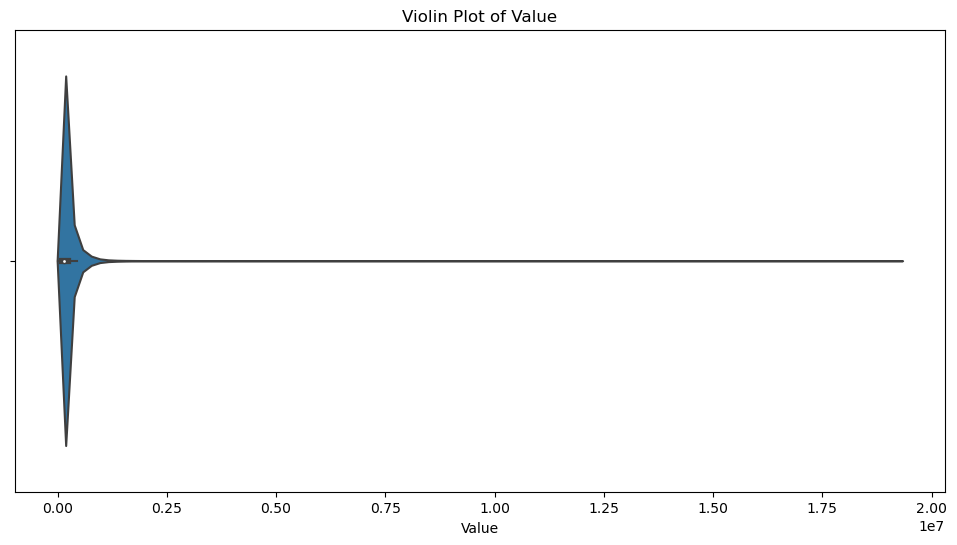

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['Value'])
plt.title('Violin Plot of Value.')
plt.xlabel('Value')
plt.grid(True)
plt.show();

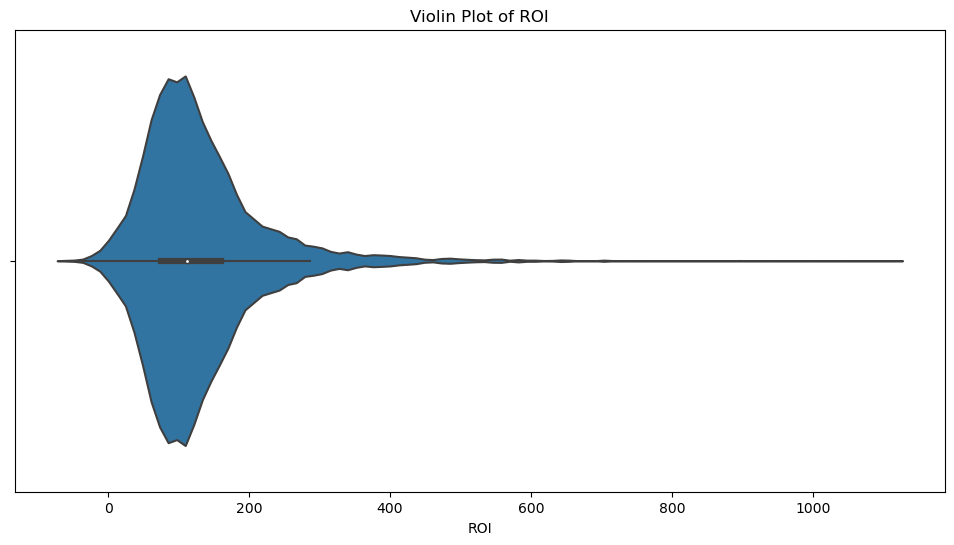

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=data['ROI'])
plt.title('Violin Plot of ROI.')
plt.xlabel('ROI')
plt.grid(True)
plt.show();


The dataset indicates that some zip codes exhibit a limited number of outliers in their price data. These outliers may, in fact, represent accurate reflections of the actual market prices in those particular regions.

### **The top 5 zip codes with the highest ROI.**

In [220]:
# Identify the top 5 zip codes with the highest ROI
top_5_zipcodes = roi_df.nlargest(5, 'ROI (%)')
top_5_zipcodes

,ZipCode,Initial Value,Final Value,ROI (%)
1565,11211,133200.0,1623700.0,1118.993994
1575,11222,149200.0,1721100.0,1053.552279
1569,11216,146100.0,1598700.0,994.250513
993,7302,137200.0,1427300.0,940.306122
1568,11215,225700.0,2243900.0,894.195835


In [221]:
data.columns

Index(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank',
       'Date', 'Value', 'Initial Value', 'Final Value', 'ROI (%)'],
      dtype='object')

In [222]:
data.shape

(3744704, 11)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744704 entries, 0 to 3744703
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   RegionID       int64  
 1   ZipCode        int64  
 2   City           object 
 3   State          object 
 4   CountyName     object 
 5   SizeRank       int64  
 6   Date           object 
 7   Value          float64
 8   Initial Value  float64
 9   Final Value    float64
 10  ROI (%)        float64
dtypes: float64(4), int64(3), object(4)
memory usage: 314.3+ MB


In [224]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,3744704.0,81016.946026,32254.359507,58196.000000,66953.000000,77920.000000,91045.000000,7.538440e+05
ZipCode,3744704.0,48008.891124,29593.750807,1001.000000,21635.000000,45827.000000,75473.000000,9.990100e+04
SizeRank,3744704.0,7243.785280,4237.745891,1.000000,3572.000000,7179.000000,10883.000000,1.472300e+04
Value,3744704.0,207606.383121,240020.726819,11300.000000,97900.000000,147600.000000,237200.000000,1.931490e+07
Initial Value,3744704.0,120181.808976,135686.447509,11300.000000,69100.000000,99800.000000,143600.000000,1.392280e+07
Final Value,3744704.0,292150.026277,358376.133801,13800.000000,135200.000000,202400.000000,326800.000000,1.789490e+07
ROI (%),3744704.0,129.133206,87.609298,-64.124943,75.210356,111.657559,159.882006,1.118994e+03


In [225]:
#statistical description of categorical variables
data.describe(include=['object'])

,City,State,CountyName,Date
count,3744704,3744704,3744704,3744704
unique,7554,51,1212,265
top,New York,CA,Los Angeles,2018-04-01
freq,29058,318744,69375,14723


### 3.2 Resampling

(a) Monthly data

In [230]:
# Extract year
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data['Year'] = data['Date'].dt.year

# Group by year and calculate mean
df_monthly = data.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'Date']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Extract year and quarter
df_monthly['year'] = df_monthly['Date'].dt.year
df_monthly['quarter'] = df_monthly['Date'].dt.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Display the result
df_quarterly

# Set the 'Date' column as the index
df_monthly.set_index('Date', inplace=True)

# Sort the DataFrame by the datetime index
df_monthly.sort_index(inplace=True)

# Display the DataFrame to verify the changes
df_monthly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Value,ROI (%),year,quarter
Date,,,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Hampden,5851,113100.0,97.701149,1996,2
1996-04-01,92329,78233,San Antonio,TX,Bexar,987,85700.0,85.997666,1996,2
1996-04-01,92334,78238,San Antonio,TX,Bexar,4303,81800.0,85.330073,1996,2
1996-04-01,62283,11932,Bridgehampton,NY,Suffolk,12615,313200.0,727.618135,1996,2
1996-04-01,92335,78239,Windcrest,TX,Bexar,3697,85200.0,75.352113,1996,2


(b) Quaterly data

In [232]:
# Extract year and quarter
df_monthly['year'] = df_monthly.index.year
df_monthly['quarter'] = df_monthly.index.quarter

# Group by year, quarter, and other columns, then calculate mean
df_quarterly = df_monthly.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year', 'quarter']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Display the result
df_quarterly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,year,quarter,Value,ROI (%)
0,58196,1001,Agawam,MA,Hampden,5851,1996,2,112833.333333,97.701149
1,58196,1001,Agawam,MA,Hampden,5851,1996,3,112100.000000,97.701149
2,58196,1001,Agawam,MA,Hampden,5851,1996,4,111733.333333,97.701149
3,58196,1001,Agawam,MA,Hampden,5851,1997,1,112100.000000,97.701149
4,58196,1001,Agawam,MA,Hampden,5851,1997,2,112766.666667,97.701149


(c) Yearly data

In [233]:
# Extract year
data['year'] = data['Date'].dt.year

# Group by year and calculate mean
df_yearly = data.groupby(['RegionID', 'ZipCode', 'City', 'State', 'CountyName', 'SizeRank', 'year']).agg({'Value': 'mean', 'ROI (%)': 'mean'}).reset_index()

# Display the result
df_yearly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,year,Value,ROI (%)
0,58196,1001,Agawam,MA,Hampden,5851,1996,112222.222222,97.701149
1,58196,1001,Agawam,MA,Hampden,5851,1997,113241.666667,97.701149
2,58196,1001,Agawam,MA,Hampden,5851,1998,116516.666667,97.701149
3,58196,1001,Agawam,MA,Hampden,5851,1999,120200.000000,97.701149
4,58196,1001,Agawam,MA,Hampden,5851,2000,126225.000000,97.701149


## 4. Exploratory Data Analysis.

This section focuses on visualizing popular counties, cities, and states, while analyzing housing prices in various states and the return on investment (ROI) for the five top-performing zip codes 

### (a) Univariate analysis.




i. Top 10 Most Popular Counties

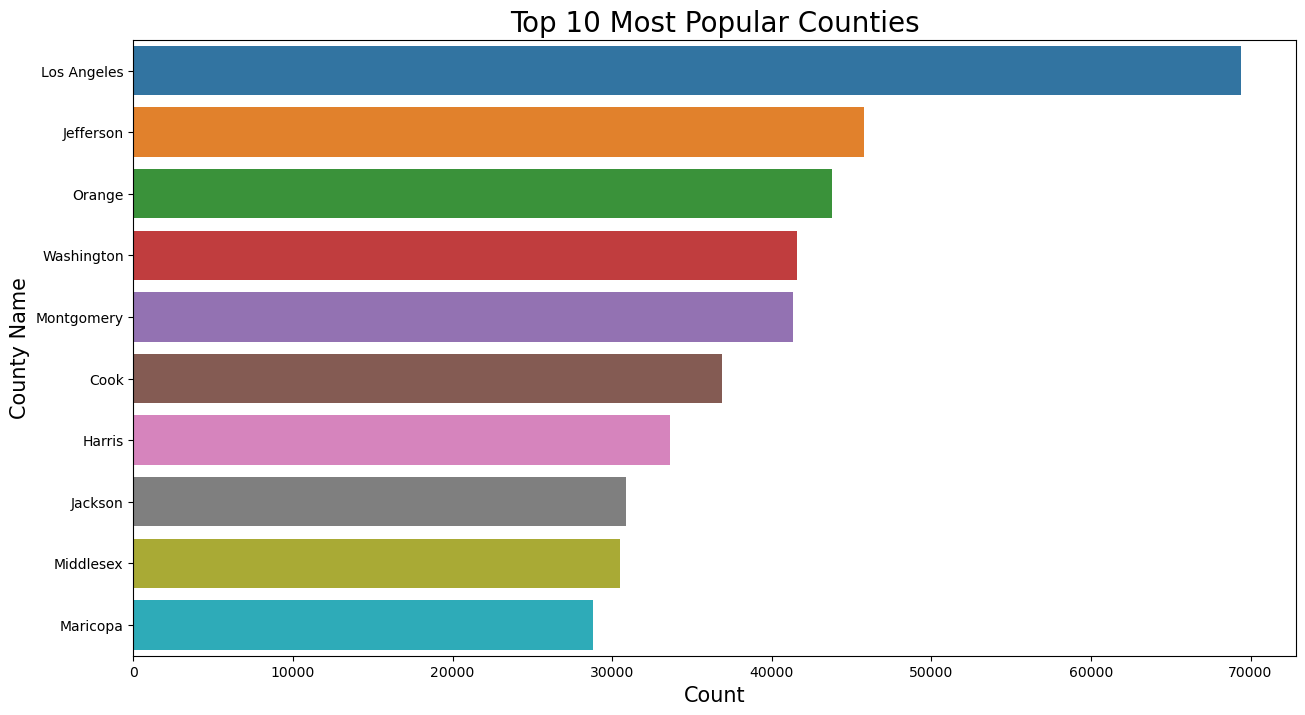

In [234]:
# plotting the most popular counties in the dataset
sns.countplot(y='CountyName', data=data, order=data['CountyName'].value_counts().index[:10])
plt.xlabel("Count",fontsize=15)
plt.ylabel("County Name",fontsize=15)
plt.title("Top 10 Most Popular Counties",fontsize=20);

Based on the bar graph above, it is evident that Los Angeles is the most popular county, featuring approximately 70,000 zip codes. In contrast, most other counties have zip code counts ranging from 30,000 to 50,000.

ii. Top 10 Most Popular Cities.

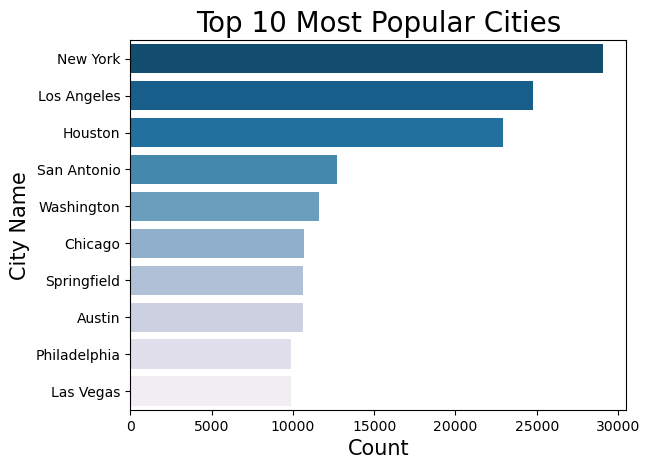

In [271]:
# plotting the most popular counties in the dataset
sns.countplot(y='City', data=data, order=data['City'].value_counts().index[:10], palette='PuBu_r')
plt.xlabel("Count",fontsize=15)
plt.ylabel("City Name",fontsize=15)
plt.title("Top 10 Most Popular Cities",fontsize=20);

From the dataset, we can conclude that New York City, Los Angeles, and Houston are the most popular cities.

iii. Average house prices by state.

This is done using the groupby function on the house values.

<Axes: xlabel='Value', ylabel='State'>

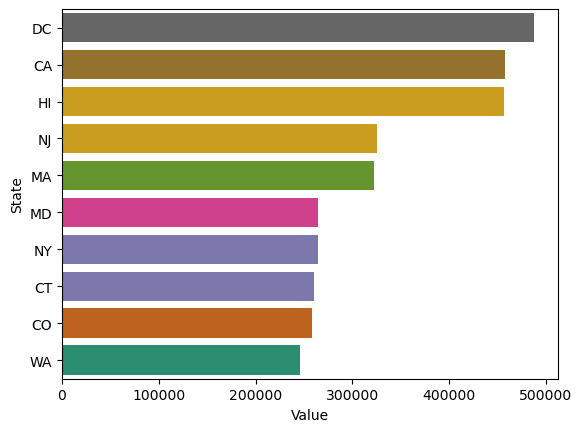

In [284]:
state_group = data.groupby('State')['Value'].agg('mean').sort_values(ascending=False).head(10)

sns.barplot(data=state_group.reset_index(), x='Value', y='State', palette='Dark2_r')

## 2. Bivariate analysis

### Top states based on average prices over years

The cell below visualizes top states with the highest property valuve over a period of time.

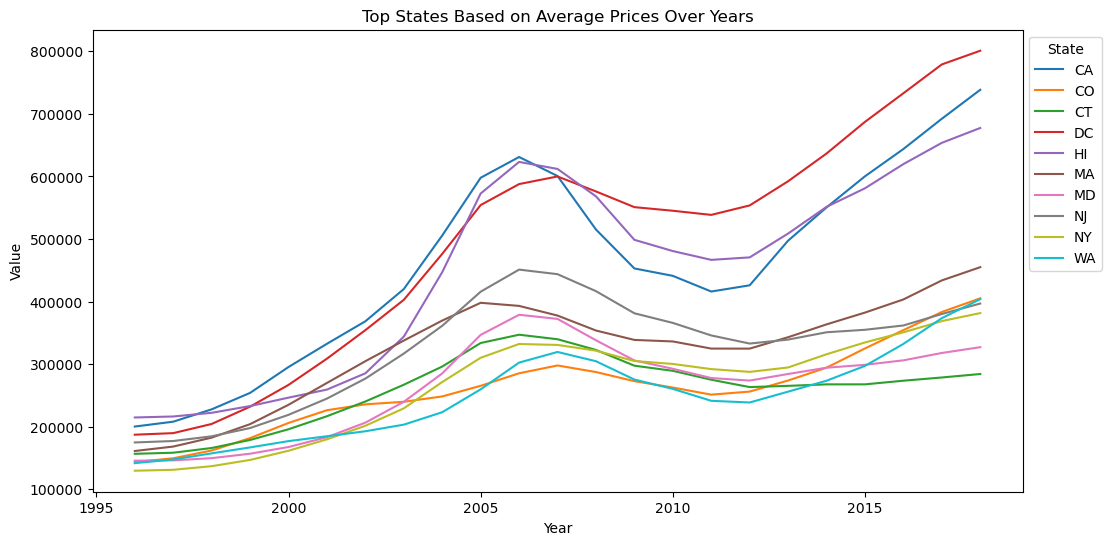

In [244]:
#Checking top 10 states based on average prices per year

# Calculate average prices by state
average_prices_by_state = data.groupby(['Year', 'State'])['Value'].mean().reset_index()

# Get top states based on average prices
top_states = average_prices_by_state.groupby('State')['Value'].mean().sort_values(ascending=False).head(10).index

# Filter the DataFrame to include only top states
df_top_states = average_prices_by_state[average_prices_by_state['State'].isin(top_states)]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Value', hue='State', data=df_top_states, ci=None)
plt.title('Top States Based on Average Prices Over Years')
plt.legend(title='State', bbox_to_anchor=(1, 1))
plt.show()

As observed, the percentage of return on investments for the top ten states experienced a significant decline from 2008 to 2012. However, since then, there has been a consistent upward trend. This indicates that the rise in investment returns began in 2012, with 2018 marking the peak year for returns.

#### Average housing price over the years

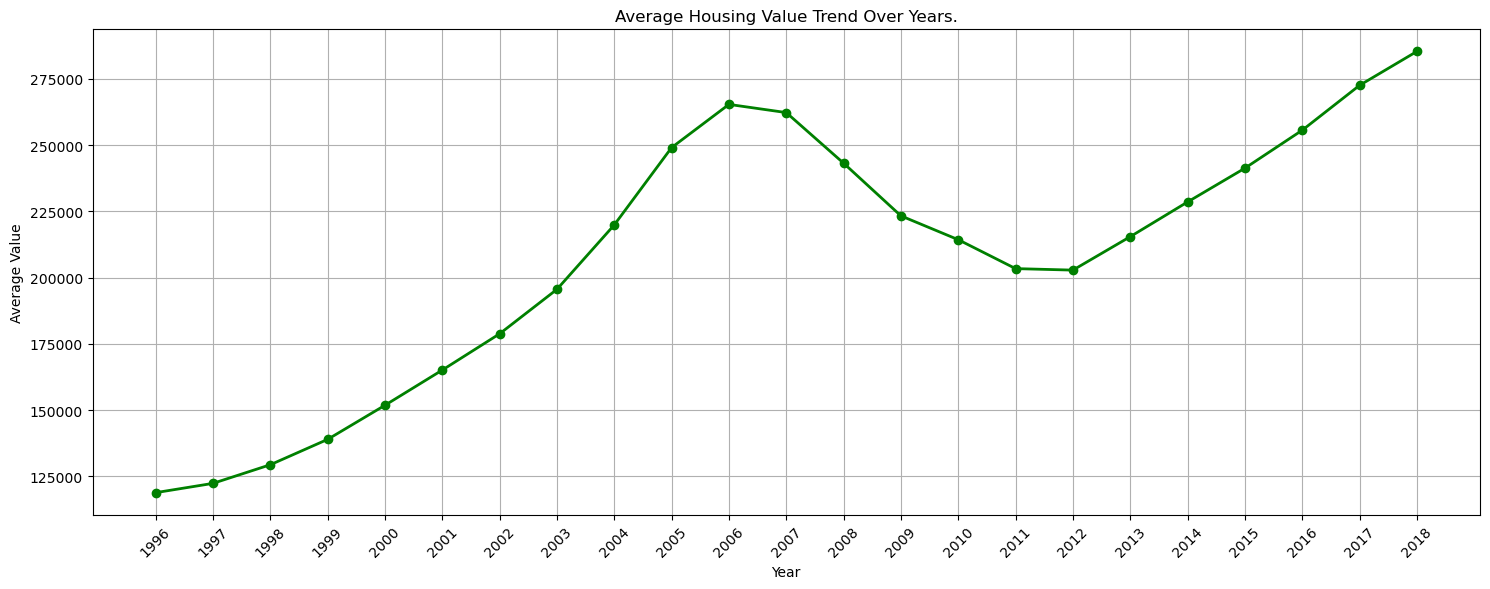

In [248]:
# Calculating average price per year

data['Year'] = data['Date'].dt.year
average_value = data.groupby('Year')['Value'].mean()
# Creating a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))
# Ploting the data
ax.plot(average_value.index, average_value.values, label='Average Price', color='green', linewidth=2, marker='o')
# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Value')
ax.set_title('Average Housing Value Trend Over Years.')
# Adding grid lines
ax.grid(True)
# Customizing x-axis ticks for each year
plt.xticks(average_value.index, rotation=45)
# Tight layout
plt.tight_layout()
# Show the plot
plt.show();

The plot reveals a steady growth in housing values from 1999 up to 2007. This growth was largely due to subprime mortgages given to low-income earners. However, from 2008 onwards, there was a noticeable drop in housing values. This period marked the housing market crash of 2008, caused by subprime mortgages, huge debts, and low regulation in the financial sector.

As outlined in [https://www.investopedia.com/articles/economics/09/subprime-market-2008.asp],US was faced with a financial crisis when the housing system collapsed and value of house prices plummuted; many homeowners and investors struggled to keep up with their mortgages. The US faced a financial crisis as the housing system collapsed. Despite the drop between 2007 and 2011, the average housing price has been increasing steadily since then.


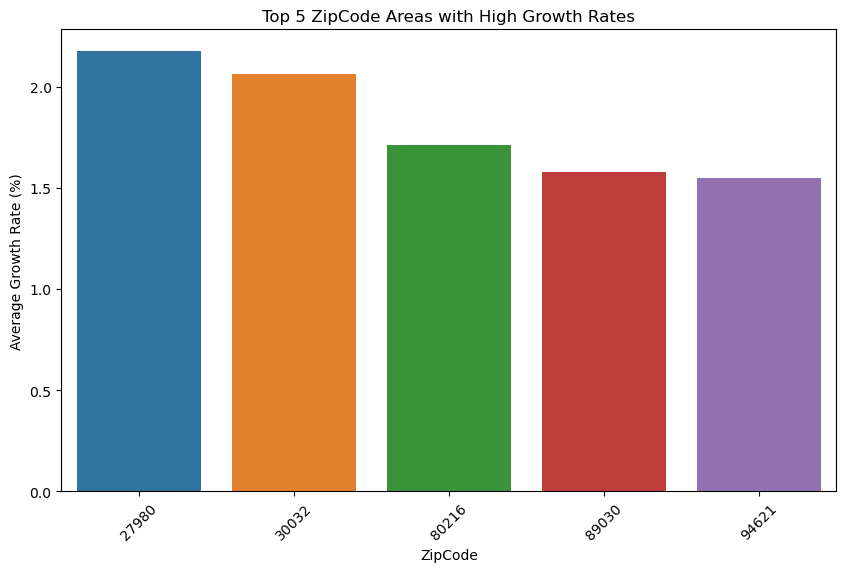

In [251]:
# Calculate the growth rate for various Zipcodes (Regions)
data['GrowthRate'] = data.groupby('ZipCode')['Value'].pct_change() * 100

# Get the average growth rate and identify the top 5 ZipCodes
average_pct_change = data.groupby('ZipCode')['GrowthRate'].mean().sort_values(ascending=False).head(5).reset_index()

# Plot the top 5 ZipCodes with the highest growth rates
plt.figure(figsize=(10,6))
sns.barplot(data=average_pct_change, x='ZipCode', y='GrowthRate')
plt.title("Top 5 ZipCode Areas with High Growth Rates")
plt.xlabel("ZipCode")
plt.ylabel("Average Growth Rate (%)")
plt.xticks(rotation=45)
plt.show();


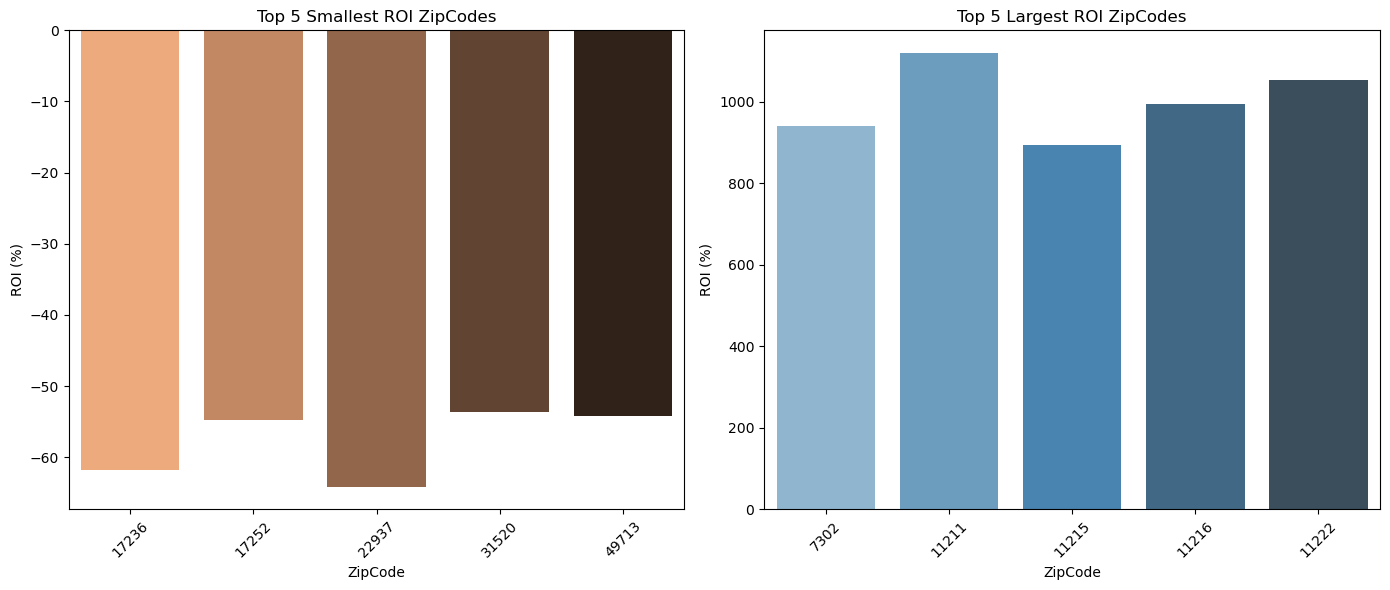

In [287]:
# Select the top 5 smallest and largest ZipCodes based on ROI
top_5_smallest_zipcodes = roi_df.nsmallest(5, 'ROI (%)')
top_5_largest_zipcodes = roi_df.nlargest(5, 'ROI (%)')

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the top 5 smallest ROI values
sns.barplot(ax=axes[0], data=top_5_smallest_zipcodes, x='ZipCode', y='ROI (%)', palette='copper_r')
axes[0].set_title("Top 5 Smallest ROI ZipCodes")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Plot the top 5 largest ROI values
sns.barplot(ax=axes[1], data=top_5_largest_zipcodes, x='ZipCode', y='ROI (%)', palette='Blues_d')
axes[1].set_title("Top 5 Largest ROI ZipCodes")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show();

## Baseline model

In this setion we will create a baseline model which will serve as a reference point for comparison with the more complex model.

By evaluating the performance of our sophisticated models against our baseiline model, we will be able to determine if the added complexity and computational effort are justified by a significant improvement in the perfromance.

The baseline model will aslo help in understanding the basic characteristics of our features.
It will also provide a baseline accuracy to measure the relative efectiveness of the next comlex model we will use.

Since most time series data always has the component of trend and sesonality, the ARIMA models have the idea of differencing to ensure stationarity. This is also one of the assumptions of ARMA models. 

In [ ]:
#Counter check the date column is the index
df_monthly.head()

,RegionID,ZipCode,City,State,CountyName,SizeRank,Price,ROIPrice,year,quarter
Date,,,,,,,,,,
1996-04-01,58196,1001,Agawam,MA,Hampden,5851,113100.0,21899.0,1996,2
1996-04-01,96447,91602,Los Angeles,CA,Los Angeles,4404,256200.0,518499.0,1996,2
1996-04-01,65567,18661,White Haven,PA,Luzerne,9999,57600.0,-1801.0,1996,2
1996-04-01,65566,18660,Mountain Top,PA,Luzerne,11904,68800.0,1399.0,1996,2
1996-04-01,96449,91604,Los Angeles,CA,Los Angeles,2058,335400.0,525099.0,1996,2


In [ ]:
print(data.dtypes)

RegionID               int64
ZipCode               object
SizeRank               int64
City                  object
State                 object
Metro                 object
CountyName            object
%ROI                 float64
ROIPrice             float64
Date          datetime64[ns]
Price                float64
Year                   int64
year                   int64
dtype: object


With the knowledge that it would be difficult to use the whole datasets we will use afew features. We seek to narrow down the forecast to only the afore mentioned **top 30 zipcodes** with the highest prices. 

In [ ]:
# Baseline model for forecast of specific zip codes. 
unique_counties = group_metropolitan.index.get_level_values('ZipCode')


tsc = TimeSeriesSplit(n_splits=5)

all_train_dates, all_test_dates = [], []
all_train_values, all_test_values = [], []
all_forecasts = []

results_list1 = []

for county in unique_counties:
    county_data = df_monthly[df_monthly['ZipCode'] == county]

    # Split the data 
    dates = county_data.index
    values = county_data['ROIPrice'].values

    # accumulate values for each fold
    zip_train_dates, zip_test_dates = [], []
    zip_train_values, zip_test_values = [], []

    for train_index, test_index in tsc.split(dates):
        train_dates, test_dates = dates[train_index], dates[test_index]
        train_values, test_values = values[train_index], values[test_index]

        zip_train_dates.extend(train_dates)
        zip_test_dates.extend(test_dates)
        zip_train_values.extend(train_values)
        zip_test_values.extend(test_values)

        baseline_model = ARIMA(train_values, order=(1, 0, 1)).fit()
        forecast = pd.Series(baseline_model.predict(start=len(train_values), end=len(train_values) + 11, typ='levels'))
        
        print(baseline_model.summary())

        all_forecasts.extend(forecast)
        forecasted_value = forecast.iloc[-1]
        real_value = test_values[-1]
        percentage_change = ((forecasted_value - real_value) / real_value) * 100
        # Append the forecasted values to the list 
        results_list1.append({'County': county, 'Forecast': forecasted_value, 'Real': real_value, 'Percentage Change': percentage_change})


results_df = pd.DataFrame(results_list1)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   32
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 340.422
Date:                Fri, 26 Jul 2024   AIC                           -672.843
Time:                        15:29:08   BIC                           -666.980
Sample:                             0   HQIC                          -670.900
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.939e+06   2.88e-13   2.41e+19      0.000    6.94e+06    6.94e+06
ar.L1       1.507e-17   1.35e-18     11.184      0.000    1.24e-17    1.77e-17
ma.L1        4.29e-16   1.35e-18    318.493      0.0

In [ ]:
results_df.head()

,County,Forecast,Real,Percentage Change
0,10021,6.938599e+06,6938599.0,-6.952774e-11
1,10021,6.938599e+06,6938599.0,-6.952774e-11
2,10021,6.938599e+06,6938599.0,-6.952774e-11
3,10021,6.938599e+06,6938599.0,-6.952774e-11
4,10021,6.938599e+06,6938599.0,-6.954116e-11


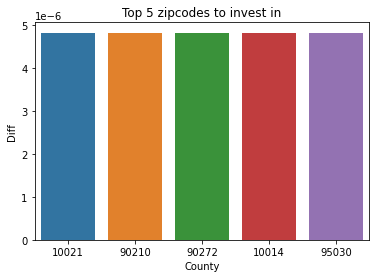

In [ ]:
#Plotting the zipcodes with high forecasted values
avg_results = results_df.groupby('County')[['Forecast', 'Real']].mean().reset_index()
avg_results['Diff'] =avg_results['Real'] - avg_results['Forecast']
top_5 = avg_results.sort_values(by='Diff', ascending=False).head(5)
sns.barplot(data=top_5, x='County', y='Diff')
plt.title("Top 5 zipcodes to invest in")
plt.show()